# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [2]:
# Install the required libraries
!pip install prophet

In [3]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [4]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

<ipython-input-4-217fb1a948ac>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [9]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

print(df_mercado_trends.columns)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB
Index(['Search Trends'], dtype='object')


                     Date  Search Trends
33985 2020-05-01 00:00:00             80
33986 2020-05-01 01:00:00             80
33987 2020-05-01 02:00:00             76
33988 2020-05-01 03:00:00             66
33989 2020-05-01 04:00:00             53
...                   ...            ...
34724 2020-05-31 19:00:00             59
34725 2020-05-31 20:00:00             64
34726 2020-05-31 21:00:00             76
34727 2020-05-31 22:00:00             90
34728 2020-05-31 23:00:00             96

[744 rows x 2 columns]


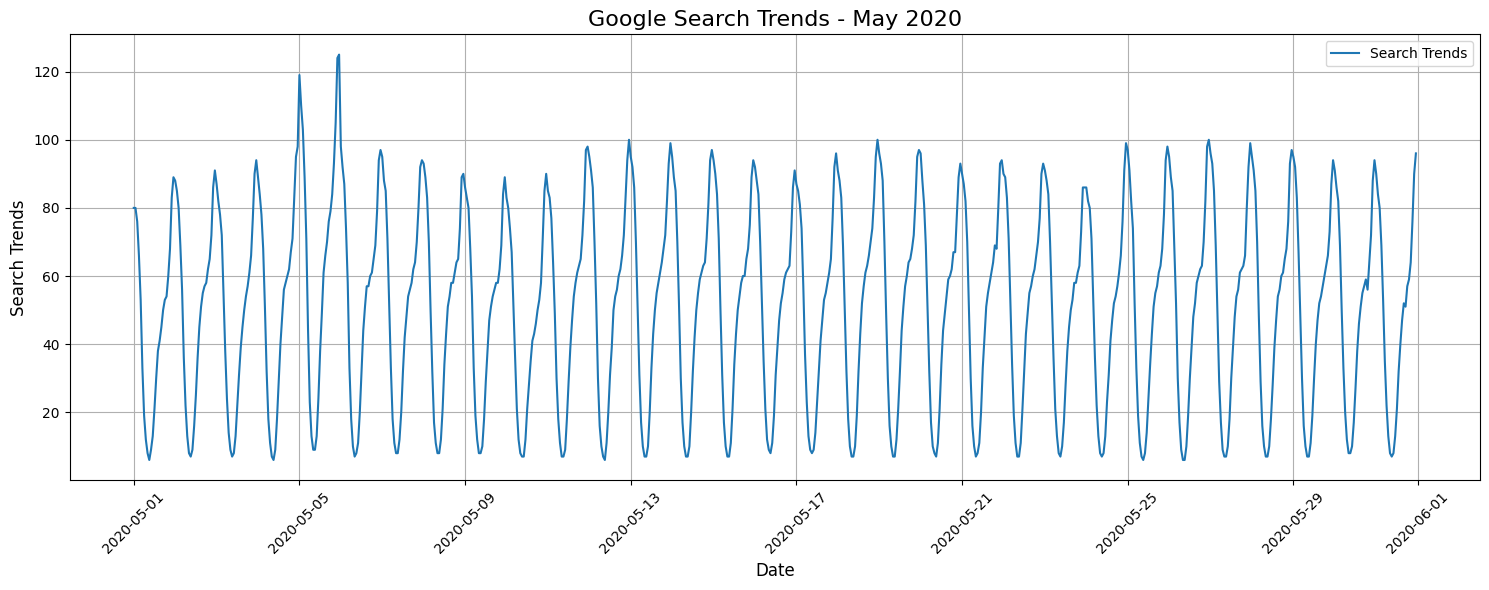

In [11]:
# Load the CSV file into a DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv"
df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y %H:%M')

# Filter the DataFrame for May 2020
may_2020_df = df[(df['Date'] >= '2020-05-01') & (df['Date'] < '2020-06-01')]

# Display the filtered DataFrame
print(may_2020_df)

# Plot to visualize the data for May 2020
import matplotlib.pyplot as plt
# Plot the search trends for May 2020
plt.figure(figsize=(15, 6))
plt.plot(may_2020_df['Date'], may_2020_df['Search Trends'], label='Search Trends')

# Customize the plot
plt.title('Google Search Trends - May 2020', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Search Trends', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()












#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [12]:
# Calculate the sum of the total search traffic for May 2020
total_search_traffic_may_2020 = may_2020_df['Search Trends'].sum()

# View the traffic_may_2020 value
print(f"Total search traffic for May 2020: {total_search_traffic_may_2020}")

Total search traffic for May 2020: 38181


In [13]:
# Calcluate the monhtly median search traffic across all months
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
monthly_median_search_traffic = df.groupby(['Year', 'Month'])['Search Trends'].sum().median()

# View the median_monthly_traffic value
print(monthly_median_search_traffic)

35172.5


In [14]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
#traffic_may_2020/median_monthly_traffic
# Calculate the total search traffic for May 2020
may_2020_total_traffic = may_2020_df['Search Trends'].sum()

# Compare May 2020 traffic to the overall monthly median value
comparison = {
    "May 2020 Search Traffic": may_2020_total_traffic,
    "Overall Monthly Median Traffic": monthly_median_search_traffic,
    "Difference": may_2020_total_traffic - monthly_median_search_traffic
}

print(comparison)

{'May 2020 Search Traffic': 38181, 'Overall Monthly Median Traffic': 35172.5, 'Difference': 3008.5}


##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** Yes, the trafiic of May 2020 was higher than the overall monthly median by 3,008.5

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

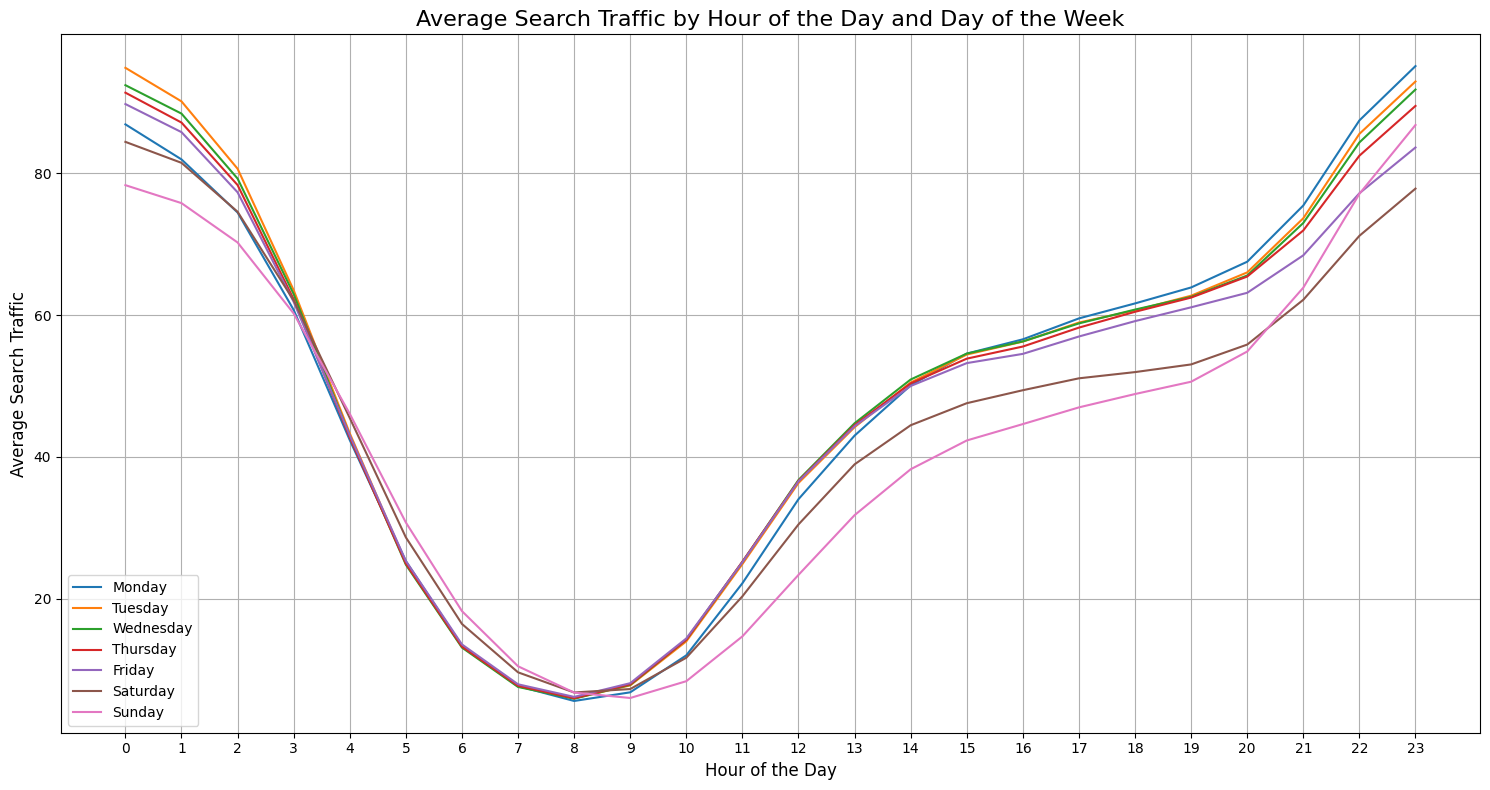

In [15]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`
# Extract hour and day of the week from the 'Date' column
df['Hour'] = df['Date'].dt.hour
df['Day_of_Week'] = df['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Group by day of the week and hour, then calculate the average search traffic
average_traffic_by_day_hour = df.groupby(['Day_of_Week', 'Hour'])['Search Trends'].mean().unstack()

# Plot the average traffic by day of the week
plt.figure(figsize=(15, 8))

for day in range(7):
    plt.plot(average_traffic_by_day_hour.columns, average_traffic_by_day_hour.loc[day], label=f'Day {day}')

# Customize the plot
plt.title('Average Search Traffic by Hour of the Day and Day of the Week', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Search Traffic', fontsize=12)
plt.xticks(range(24))
plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()












#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

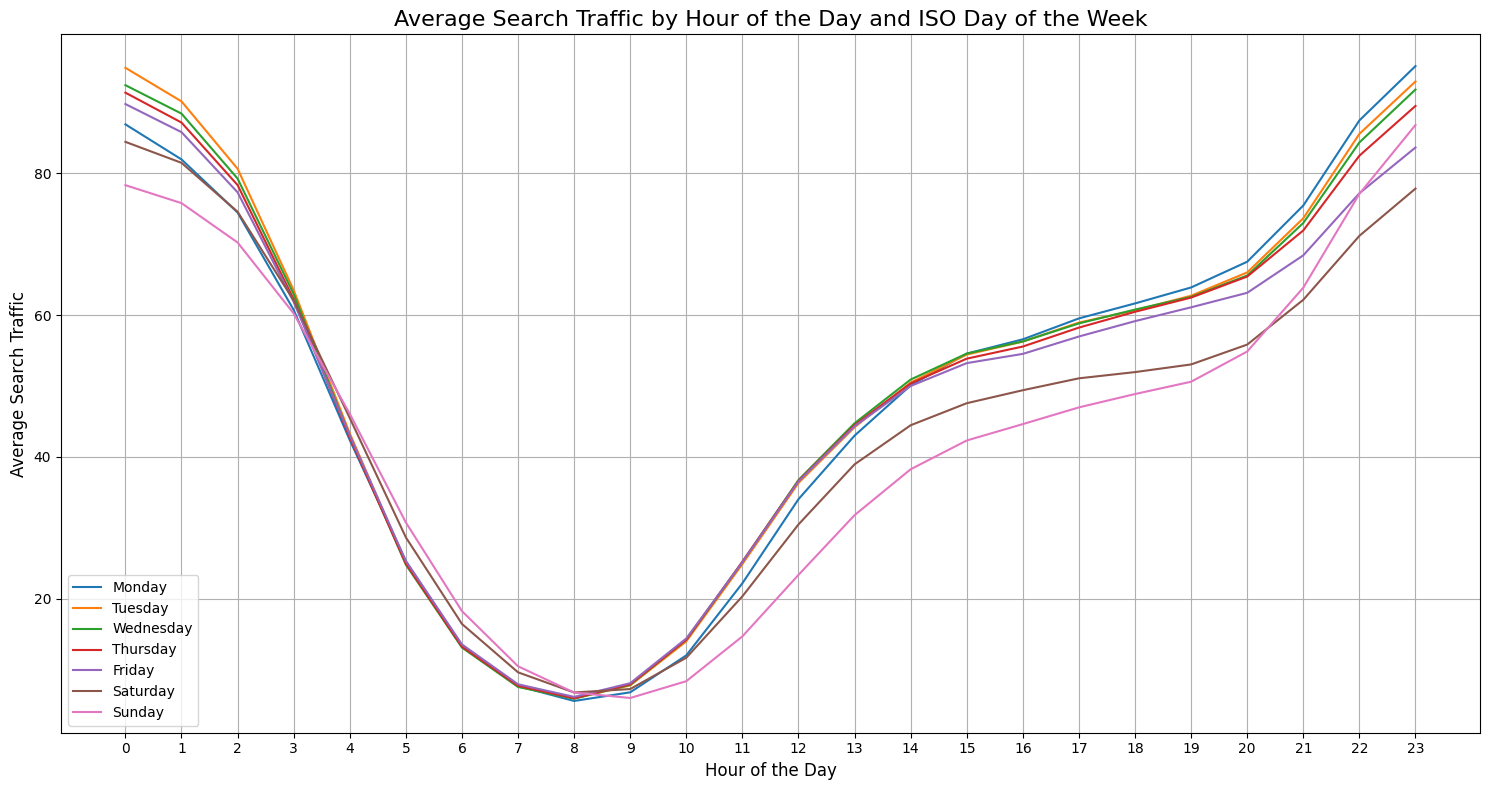

In [17]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.

# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.

# Group by ISO day of the week and hour, then calculate the average search traffic
average_traffic_by_iso_day_hour = df.groupby(['Day_of_Week', 'Hour'])['Search Trends'].mean().unstack()

# Plot the average traffic by ISO day of the week
plt.figure(figsize=(15, 8))

# Changed loop to range(7) to iterate through index values 0 to 6
for day in range(7):
    plt.plot(average_traffic_by_iso_day_hour.columns, average_traffic_by_iso_day_hour.loc[day], label=f'Day {day + 1}') # Adjusted day label for display

# Customize the plot
plt.title('Average Search Traffic by Hour of the Day and ISO Day of the Week', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Search Traffic', fontsize=12)
plt.xticks(range(24))
plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

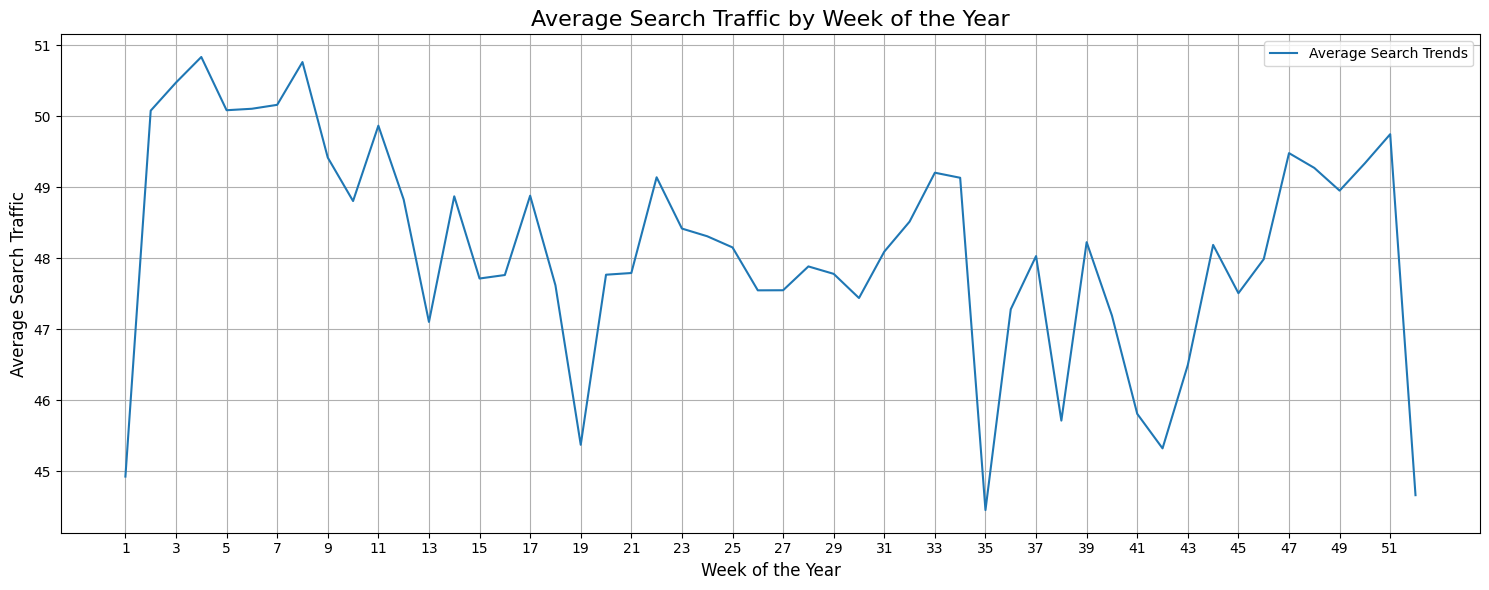

In [19]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.
# Extract week of the year from the 'Date' column
df['Week_of_Year'] = df['Date'].dt.isocalendar().week
# Group by week of the year and calculate the average search traffic
average_traffic_by_week = df.groupby(['Week_of_Year'])['Search Trends'].mean()

# Plot the average traffic by week of the year
plt.figure(figsize=(15, 6))
plt.plot(average_traffic_by_week.index, average_traffic_by_week.values, label='Average Search Trends')

# Customize the plot
plt.title('Average Search Traffic by Week of the Year', fontsize=16)
plt.xlabel('Week of the Year', fontsize=12)
plt.ylabel('Average Search Traffic', fontsize=12)
plt.xticks(range(1, 53, 2))  # Show x-axis ticks for every other week
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:** Yes,
Daily: Search traffic peaks during daytime hours and dips during late-night/early morning.
Weekly: Search traffic is relatively consistent on weekdays, with a slight dip on weekends.
Yearly: Search traffic increases during the holiday season (weeks 40-52) and might have a slight dip during the summer months.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [21]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
import pandas as pd
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


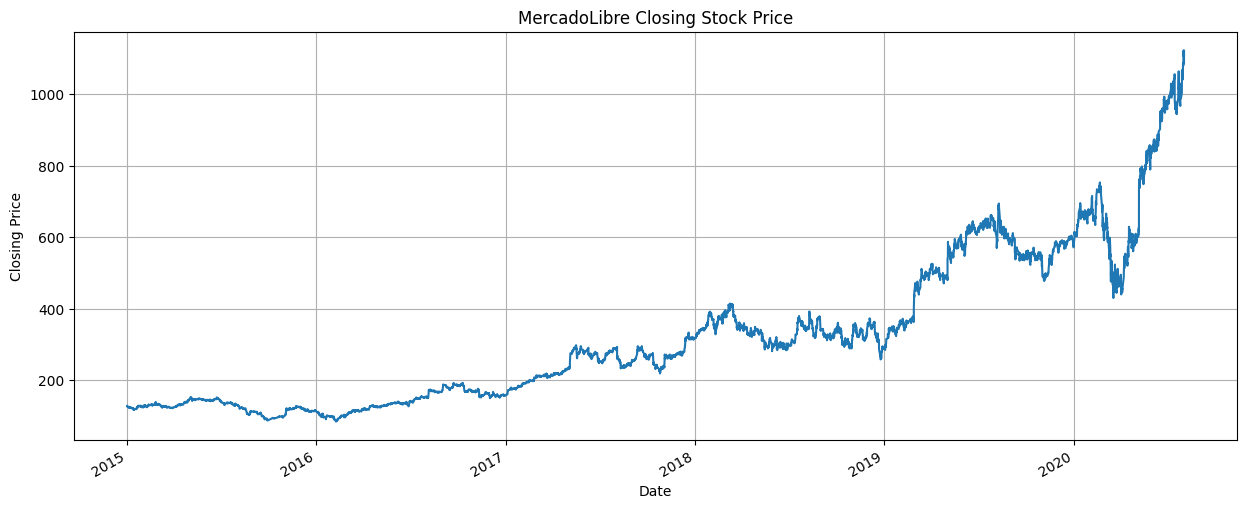

In [22]:
# Visualize the closing price of the df_mercado_stock DataFrame

df_mercado_stock['close'].plot(figsize=(15, 6), title='MercadoLibre Closing Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

In [23]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
df_mercado_trends.index.names = ['date']

# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
mercado_stock_trends_df = pd.concat([df_mercado_stock, df_mercado_trends], axis=1, join='inner')

# View the first and last five rows of the DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())

,close,Search Trends
date,,
2016-06-01 09:00:00,135.16,6
2016-06-01 10:00:00,136.63,12
2016-06-01 11:00:00,136.56,22
2016-06-01 12:00:00,136.42,33
2016-06-01 13:00:00,136.10,40


,close,Search Trends
date,,
2020-07-31 11:00:00,1105.780,20
2020-07-31 12:00:00,1087.925,32
2020-07-31 13:00:00,1095.800,41
2020-07-31 14:00:00,1110.650,47
2020-07-31 15:00:00,1122.510,53


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [24]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
first_half_2020 = mercado_stock_trends_df.loc['2020-01-01':'2020-06-30']

# View the first and last five rows of first_half_2020 DataFrame
display(first_half_2020.head())
display(first_half_2020.tail())

,close,Search Trends
date,,
2020-01-02 09:00:00,601.085,9
2020-01-02 10:00:00,601.290,14
2020-01-02 11:00:00,615.410,25
2020-01-02 12:00:00,611.400,37
2020-01-02 13:00:00,611.830,50


,close,Search Trends
date,,
2020-06-30 11:00:00,976.17,17
2020-06-30 12:00:00,977.50,27
2020-06-30 13:00:00,973.23,37
2020-06-30 14:00:00,976.50,45
2020-06-30 15:00:00,984.93,51


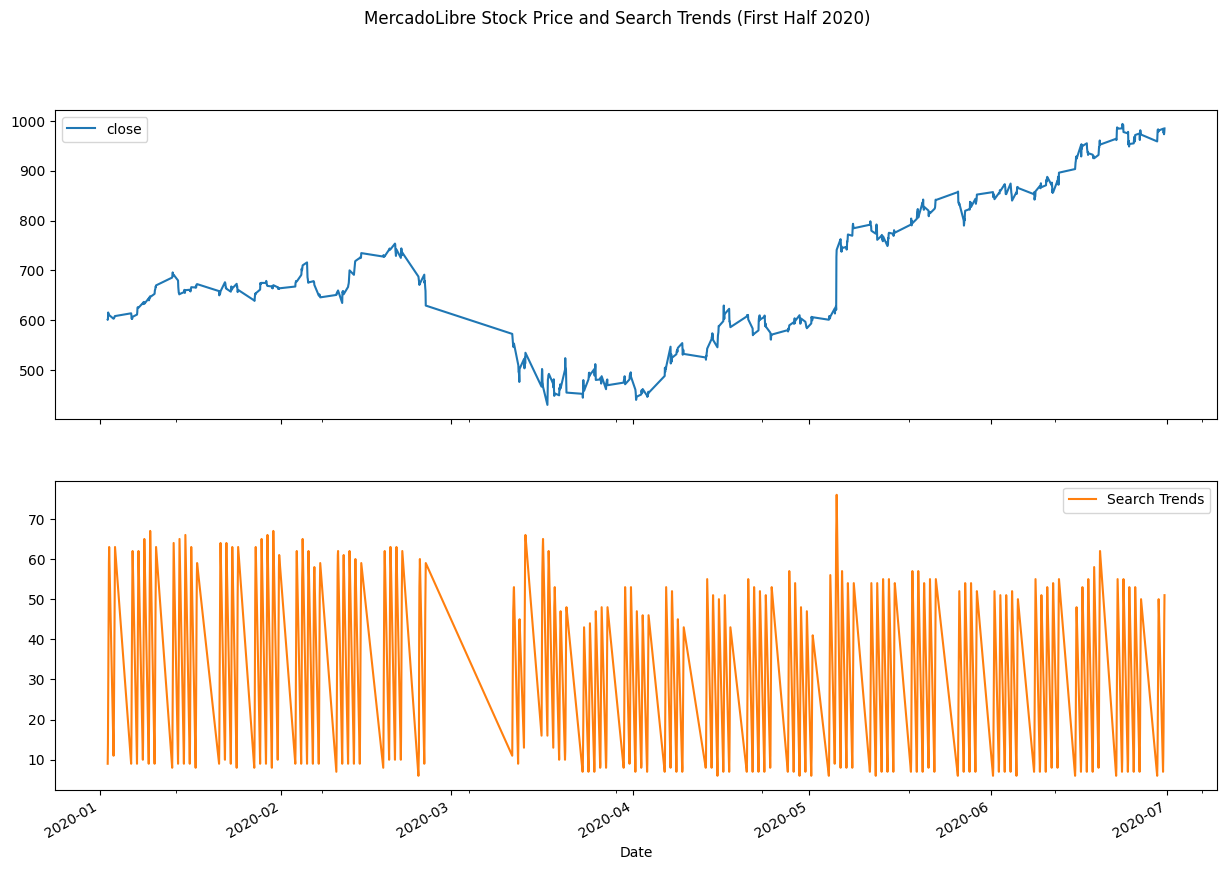

In [25]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
first_half_2020[['close', 'Search Trends']].plot(subplots=True, figsize=(15, 10), title='MercadoLibre Stock Price and Search Trends (First Half 2020)')
plt.xlabel('Date')  # Set the x-axis label for both plots
plt.show()  # Show the plot

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** Yes, both time series (stock price and search trends) indicate a common trend consistent with the narrative. They show an initial decline followed by a recovery and growth, suggesting a relationship between increased search interest and the stock price performance of MercadoLibre, aligning with the overall growth of e-commerce platforms during the period.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [26]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour

mercado_stock_trends_df['Lagged Search Trends'] = mercado_stock_trends_df['Search Trends'].shift(1)

In [27]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
mercado_stock_trends_df['Close Return'] = mercado_stock_trends_df['close'].pct_change()
mercado_stock_trends_df['Stock Volatility'] = mercado_stock_trends_df['Close Return'].rolling(window=4).std()

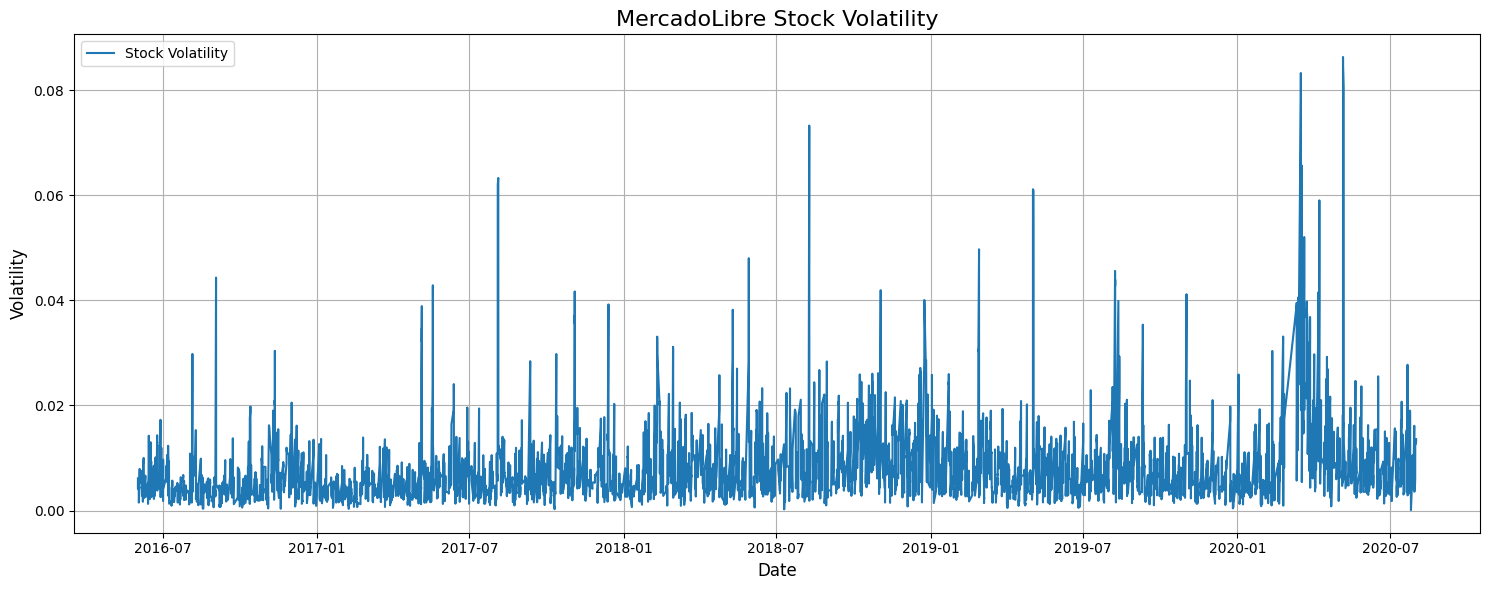

In [28]:
# Visualize the stock volatility
# Plot the 'Stock Volatility' column
plt.figure(figsize=(15, 6))
plt.plot(mercado_stock_trends_df.index, mercado_stock_trends_df['Stock Volatility'], label='Stock Volatility')

# Customize the plot
plt.title('MercadoLibre Stock Volatility', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility', fontsize=12)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [29]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price

mercado_stock_trends_df['Hourly Stock Return'] = mercado_stock_trends_df['close'].pct_change()

In [30]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())

,close,Search Trends,Lagged Search Trends,Close Return,Stock Volatility,Hourly Stock Return
date,,,,,,
2016-06-01 09:00:00,135.16,6,NaN,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12,6.0,0.010876,NaN,0.010876
2016-06-01 11:00:00,136.56,22,12.0,-0.000512,NaN,-0.000512
2016-06-01 12:00:00,136.42,33,22.0,-0.001025,NaN,-0.001025
2016-06-01 13:00:00,136.10,40,33.0,-0.002346,0.006134,-0.002346


,close,Search Trends,Lagged Search Trends,Close Return,Stock Volatility,Hourly Stock Return
date,,,,,,
2020-07-31 11:00:00,1105.780,20,11.0,0.006380,0.012837,0.006380
2020-07-31 12:00:00,1087.925,32,20.0,-0.016147,0.013549,-0.016147
2020-07-31 13:00:00,1095.800,41,32.0,0.007239,0.013295,0.007239
2020-07-31 14:00:00,1110.650,47,41.0,0.013552,0.013001,0.013552
2020-07-31 15:00:00,1122.510,53,47.0,0.010678,0.013566,0.010678


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [32]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
correlation_table = mercado_stock_trends_df[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()
display(correlation_table)

,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.148938,0.061424
Lagged Search Trends,-0.148938,1.000000,0.017929
Hourly Stock Return,0.061424,0.017929,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** Based onthe data, there is no strong predictable relationship between lagged search traffic and either stock volatility or stock price returns.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [43]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
mercado_prophet_df = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
mercado_prophet_df = mercado_prophet_df.rename(columns={'date': 'ds', 'Search Trends': 'y'})

# Drop an NaN values from the prophet_df DataFrame
mercado_prophet_df = mercado_prophet_df.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
display(mercado_prophet_df.head())
display(mercado_prophet_df.tail())

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [34]:
# Call the Prophet function, store as an object
model_mercado_trends = Prophet()

In [44]:
# Fit the time-series model.

model_mercado_trends.fit(mercado_prophet_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmptfyzuhij/2vmkfmej.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptfyzuhij/_t3rh2sm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93508', 'data', 'file=/tmp/tmptfyzuhij/2vmkfmej.json', 'init=/tmp/tmptfyzuhij/_t3rh2sm.json', 'output', 'file=/tmp/tmptfyzuhij/prophet_modeljv7l89le/prophet_model-20241211165904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:59:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:59:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [45]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model_mercado_trends.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
display(future_mercado_trends.tail())

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [46]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model_mercado_trends.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
display(forecast_mercado_trends.head())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.469500,81.682212,97.679702,44.469500,44.469500,45.159722,45.159722,45.159722,41.452703,...,1.860594,1.860594,1.860594,1.846426,1.846426,1.846426,0.0,0.0,0.0,89.629222
1,2016-06-01 01:00:00,44.470406,77.561608,95.035788,44.470406,44.470406,41.605529,41.605529,41.605529,37.943556,...,1.810498,1.810498,1.810498,1.851474,1.851474,1.851474,0.0,0.0,0.0,86.075935
2,2016-06-01 02:00:00,44.471312,67.227693,84.212093,44.471312,44.471312,31.282049,31.282049,31.282049,27.656646,...,1.768912,1.768912,1.768912,1.856491,1.856491,1.856491,0.0,0.0,0.0,75.753361
3,2016-06-01 03:00:00,44.472218,52.020445,68.639174,44.472218,44.472218,16.014826,16.014826,16.014826,12.417424,...,1.735926,1.735926,1.735926,1.861476,1.861476,1.861476,0.0,0.0,0.0,60.487045
4,2016-06-01 04:00:00,44.473124,35.062972,52.455746,44.473124,44.473124,-1.100073,-1.100073,-1.100073,-4.677999,...,1.711496,1.711496,1.711496,1.866430,1.866430,1.866430,0.0,0.0,0.0,43.373051


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

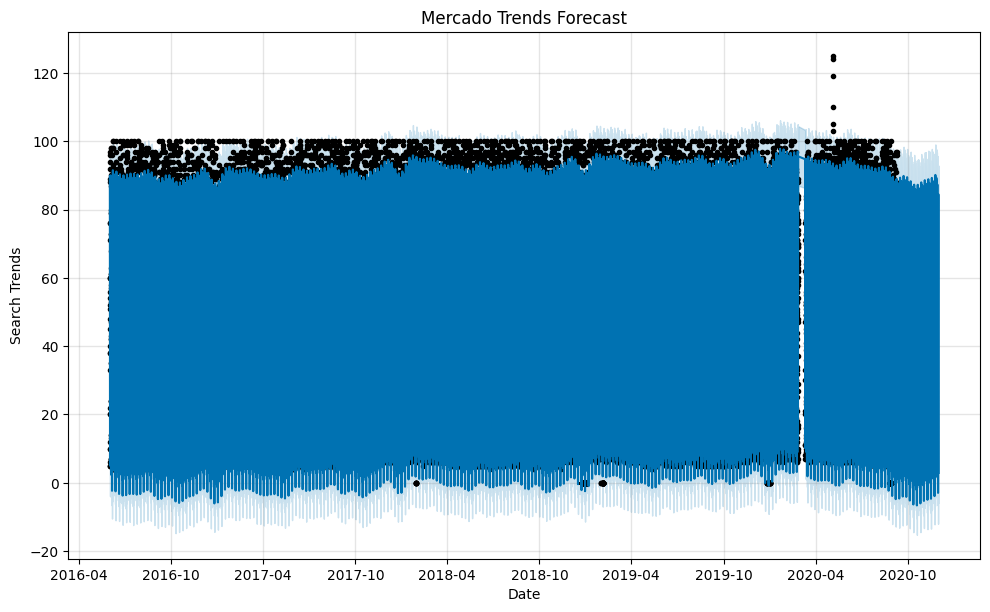

In [47]:
# Plot the Prophet predictions for the Mercado trends data
model_mercado_trends.plot(forecast_mercado_trends)
plt.title("Mercado Trends Forecast")
plt.xlabel("Date")
plt.ylabel("Search Trends")
plt.show()

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** The near-term forecast for the popularity of MercadoLibre suggests a slight upward trend in search trends over the next few weeks. The uncertainty interval is relatively narrow, indicating a reasonable level of confidence in the forecast. There are also some weekly seasonal patterns, with higher search trends on certain days of the week.


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [48]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends = forecast_mercado_trends.set_index('ds')

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame

display(forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']])

,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.629222,81.682212,97.679702
2016-06-01 01:00:00,86.075935,77.561608,95.035788
2016-06-01 02:00:00,75.753361,67.227693,84.212093
2016-06-01 03:00:00,60.487045,52.020445,68.639174
2016-06-01 04:00:00,43.373051,35.062972,52.455746
...,...,...,...
2020-11-30 04:00:00,39.781638,31.160075,47.516713
2020-11-30 05:00:00,24.310504,15.541502,33.399725
2020-11-30 06:00:00,12.344836,3.455605,21.089006


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

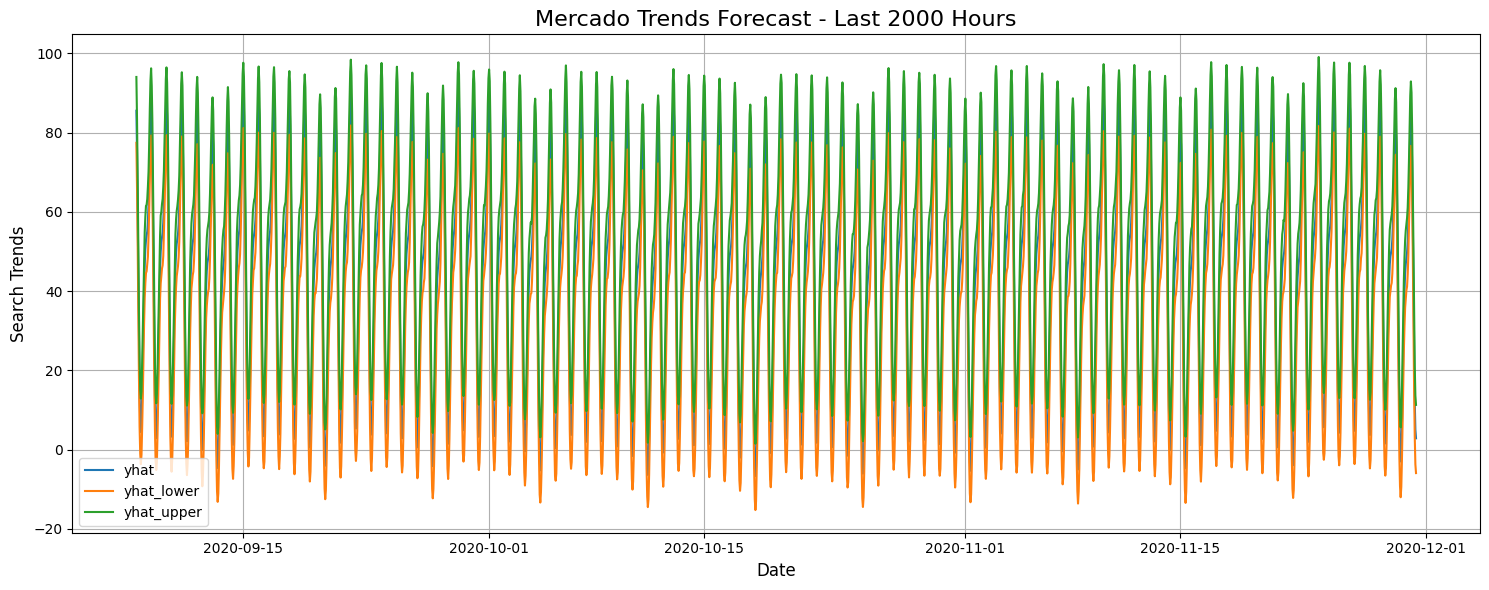

In [49]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
# Select the last 2000 hours of data
last_2000_hours = forecast_mercado_trends.tail(2000)

# Plot the data
plt.figure(figsize=(15, 6))
plt.plot(last_2000_hours.index, last_2000_hours['yhat'], label='yhat')
plt.plot(last_2000_hours.index, last_2000_hours['yhat_lower'], label='yhat_lower')
plt.plot(last_2000_hours.index, last_2000_hours['yhat_upper'], label='yhat_upper')

# Customize the plot
plt.title('Mercado Trends Forecast - Last 2000 Hours', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Search Trends', fontsize=12)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

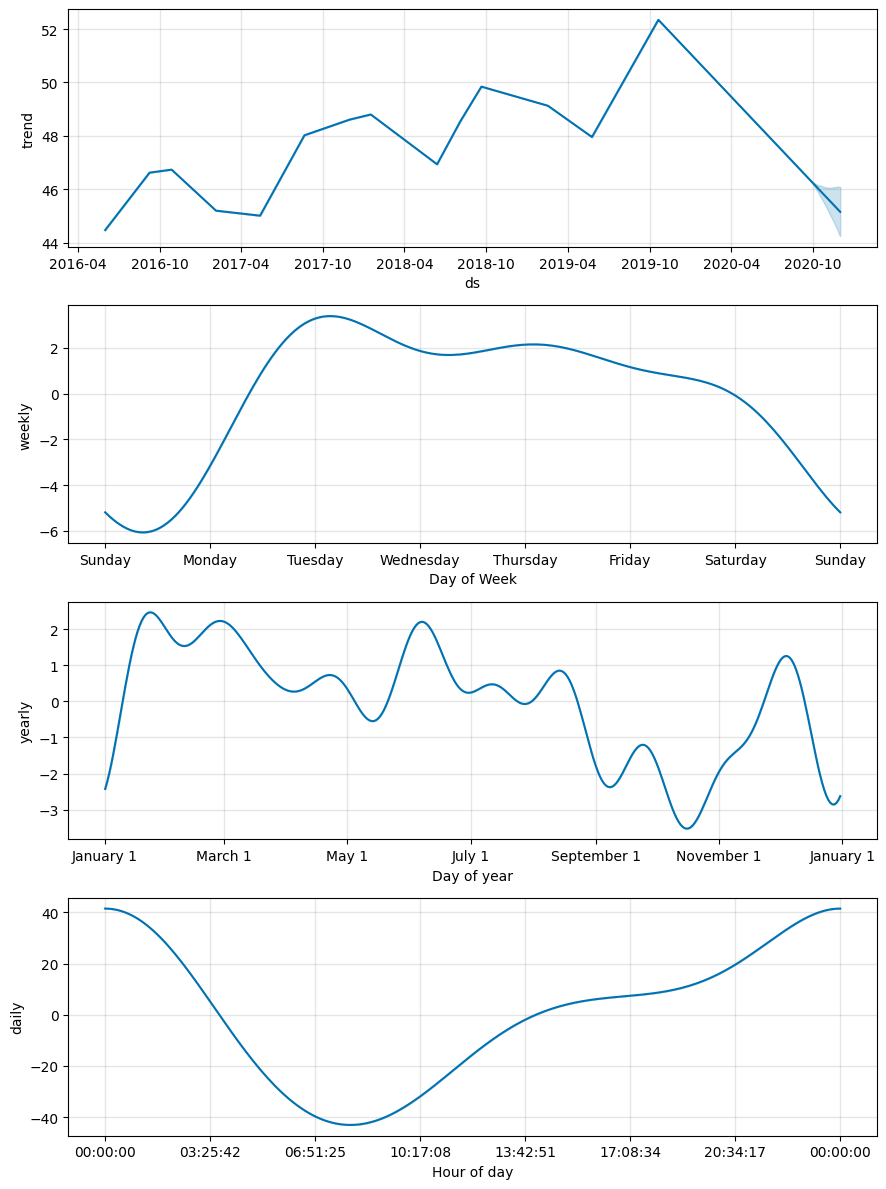

In [50]:
# Reset the index in the forecast_mercado_trends DataFrame

forecast_mercado_trends = forecast_mercado_trends.reset_index()
# Use the plot_components function to visualize the forecast results
# for the forecast_mercado_trends DataFrame
model_mercado_trends.plot_components(forecast_mercado_trends)
plt.show()

##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** As per the code analysis it's 14th hour.

In [63]:
import numpy as np

# Get the daily seasonality values
daily_seasonality = forecast_mercado_trends["daily"].values

# Find the index of the maximum daily seasonality
peak_hour_index = np.argmax(daily_seasonality)

# Calculate the peak hour of the day
peak_hour = (peak_hour_index / len(daily_seasonality)) * 24

print(f"The hour with the greatest popularity is: {int(peak_hour)}")

The hour with the greatest popularity is: 14


**Question:** Which day of week gets the most search traffic?
   
**Answer:** As per the code analysis it's Thursday.

In [64]:
# Extract the weekly seasonality values
weekly_seasonality = forecast_mercado_trends['weekly']

# Find the day of the week with the maximum value
peak_day_index = weekly_seasonality.idxmax()

# Convert peak_day_index to a Timestamp object using to_pydatetime() if necessary
peak_day_datetime = pd.Timestamp(peak_day_index).to_pydatetime()


# Convert the day of the week to a string representation
# (Assuming the days are represented as 0 for Monday, 1 for Tuesday, etc.)
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
peak_day_name = days_of_week[peak_day_datetime.weekday()]  # Get day name from the index's weekday

print(f"The day with the most search traffic is: {peak_day_name}")

The day with the most search traffic is: Thursday


<ipython-input-64-dc5655e1f618>:8: UserWarning: Discarding nonzero nanoseconds in conversion.
  peak_day_datetime = pd.Timestamp(peak_day_index).to_pydatetime()


**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** As per the code analysis the lowest traffic month is January.


In [67]:
# Extract the yearly seasonality from the forecast DataFrame
yearly_seasonality = forecast_mercado_trends['yearly']

# Find the minimum value and its corresponding date
min_value = yearly_seasonality.min()
min_date = yearly_seasonality.idxmin()

# Convert min_date to a datetime object using pd.to_datetime()
min_date = pd.to_datetime(min_date)

# Extract the month name from the date
month_name = min_date.strftime('%B')

print(f"The lowest point for search traffic in the calendar year is around: {month_name}")

The lowest point for search traffic in the calendar year is around: January
